<a href="https://colab.research.google.com/github/johnpharmd/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear%20Regression%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to **improve iteratively your home price estimation and practice implementing predictive linear regression models**. 

# Bivariate Regression

**_Pick the X variable_** that you think will be the most correlated with Y. 

**_Split your dataset_** into a 50-50 test-train-split (50% of data for training, and 50% for testing).

**_Train a regression model_** using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

**_Report_** your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [0]:
# help(tts)

In [0]:
# target, or Y, variable is 'price'
# recall the essential real estate cliche: "location, location, location"
# thus, my initial prediction is that 'zipcode' will be the X variable most highly correlated with Y

# 1st, let's secure 'price' by making a copy of it and working on copy only
price_copy = df.price.copy()

# 2nd, let's find a mechanism to compare all other features individually as potential X variables for Y target
# use a 'for' loop; generator; sns pairplot; or some combination of these methods
import seaborn as sns


In [0]:
price_copy1 = price_copy.copy()
Y = price_copy1
all_possible_X = df.copy()
all_possible_X = all_possible_X.drop('price', axis=1)
all_possible_X.describe()

# note that 'price' is column02, and 'zipcode' is column16
# sns.pairplot(df);
# from eyeballing pairplot, strongest correlates to 'price' seem to be 'sqft_living' and 'grade'
# Pick as X variable: 'sqft_living'
X = all_possible_X.sqft_living

In [0]:
# Now, to split df into 50-50 test-train-split
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.5, random_state=42)


In [7]:
# Format X_train and y_train
X_train = X_train.values[:, np.newaxis]
y_train = y_train.values

# Train regression model on X_train and y_train
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
print('Slope Coefficient:', lin_reg.coef_)
print('Intercept Value:', lin_reg.intercept_)

Slope Coefficient: [268.42931803]
Intercept Value: -20631.156554487883


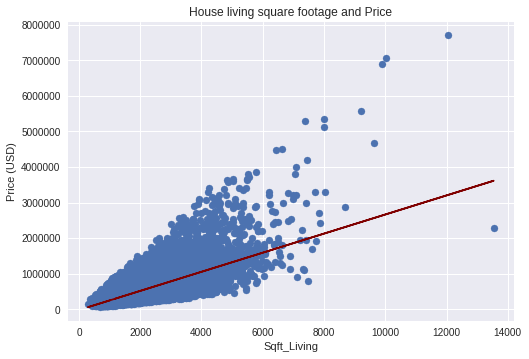

In [8]:
# Plot points and line-of-best-fit
# CREDIT TO RYAN ALLRED/LSDS for following methods

m_hat = lin_reg.coef_[0]
b_hat = lin_reg.intercept_

# Plot the points
plt.scatter(X, price_copy1)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, color='maroon')

# Graph axes and title
plt.ylabel("Price (USD)")
plt.xlabel("Sqft_Living")
plt.title("House living square footage and Price")
plt.show();



In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Report RMSE and R**2
# CREDIT TO RYAN ALLRED/LSDS for following methods

# Format X_test and y_test
X_test = X_test.values[:, np.newaxis]
# y_test = y_test.values

y_test_predict = lin_reg.predict(X_test)

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75628624138.70985
RMSE is 275006.58926416625
R^2 is 0.49226256935760826


# Two-variable Multiple Regression

To ramp up slowly, **_pick a second X variable_** that you think will be the most correlated with Y. 

**_Split your dataset_** into a 50-50 test-train-split (50% of data for training, and 50% for testing).

**_Train a regression model_** using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

**_Report_** your Root Mean Squared Error and R-squared for this model.

In [0]:
# Preprocess data
all_possible_X = df.copy().drop('price', axis=1)
X_2var = all_possible_X[['sqft_living', 'grade']]
y = price_copy1
X_2var_train, X_2var_test, y_2var_train, y_2var_test = tts(X_2var, y, test_size=0.5, random_state=42)

In [16]:
# Format X_2var_train and y_train
# X_2var_train = X_2var_train.values[:, np.newaxis]
# y_train = y_train.values

# Train regression model on X_2var_train and y_2var_train
from sklearn.linear_model import LinearRegression
var2_lin_reg = LinearRegression().fit(X_2var_train, y_2var_train)
print('Slope Coefficient:', var2_lin_reg.coef_)
print('Intercept Value:', var2_lin_reg.intercept_)

Slope Coefficient: [   167.10832275 103065.16259903]
Intercept Value: -599835.6618581187


In [0]:
# Plot points and plane-of-best-fit
# previously credited RYAN ALLRED/LSDS; credit also to ZACH ANGELL/LSDS
from mpl_toolkits.mplot3d import Axes3D

m_hat = var2_lin_reg.coef_[0]
b_hat = var2_lin_reg.intercept_

# Set the grid
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_2var_test, y_2var_test)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X_2var_test]
# plt.plot(X, y_hat, color='maroon')

# Graph axes and title

ax.set_xlabel('Square Feet of Living Space')
ax.set_ylabel('Square Feet of Lot Space')
ax.set_zlabel('Home Price')
ax.set_title('Home Price Plane of Best Fit Based on Living Space and Lot Space')


plt.show();
# print('X_2var_test shape:', X_2var_test.shape)
# print('y_test_reshape:', y_test_reshape)


# Multiple Regression

Now using all available X variables, **_split your data into test and training datasets, train your model, obtain its coefficients, and report_** the Root Mean Squared Error and R-squared values.

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
